# 16 Likelihood (MLE와 MAP

머신러닝 모델의 역할은 결국 무엇일까?

데이터 집합과 데이터에 따르는 정확한 확률분포가 알고 싶지만, 불가능하다. 따라서 파라미터에 의해 결정되는 머신러닝 모델을 만든다음, 파라미터의 값을 조절하여
데이터의 직간접적으로 표현한다. 가장 간단한 일차함수 y = ax + b를 보자.
a와 b라는 파라미터가 있고, 이것들이 위치하는 평면 또는 다차원 공간을 파라미터 공간이라 부른다.
이 공간상에 두 점을 뽑아 선을 그리는 코드를 찾는다.

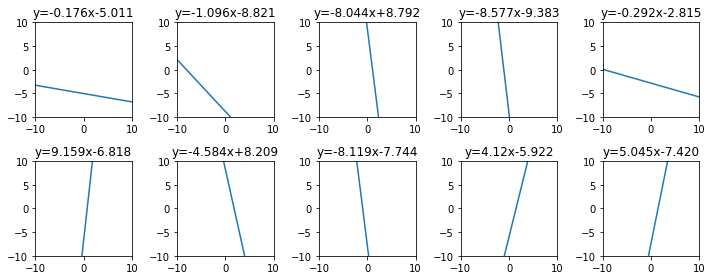

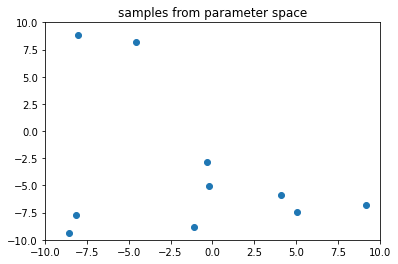

In [3]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, ax1 = plt.subplots(2,5, figsize=(10,4))

for ax in ax1.flatten():
  a, b = np.random.uniform(-10,10, size = 2)
  a = round(a,3)
  b = round(b,3)
  parameter_points.append((a,b))

  x = np.linspace(-10,10,50)
  y = a*x+b
  ax.plot(x,y)

  ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
  ax.set_xlim(-10,10)
  ax.set_ylim(-10,10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points),2,axis=1)
fig2 = plt.figure()
ax2 = plt.gca()

ax2.set_title('samples from parameter space')
ax2.set_xlim(-10,10)
ax2.set_ylim(-10,10)

plt.scatter(px,py)
plt.show()

a,b 위치들을 파라미터 공간에 주어진 확률 분포로 표현할 수 있다.
평균이 (1,0)인 정규분포를 그려보자.
(a,b)의 값이 (1,0)에 가까울 확률 즉, y = x에 가까울 확률에 대한 분포를 그려볼 수 있다.

아래 코드는 평균이 (1,0)이며 표준편차가 0.5인 정규분포에서 10개의 점을 무작위로 뽑아 위왁 같이 파라미터공간에 출력한다.

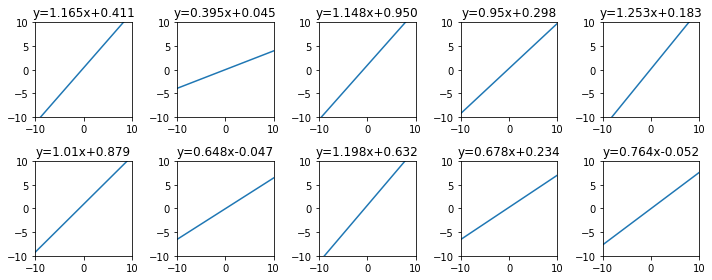

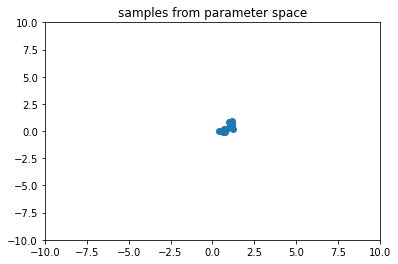

In [4]:
parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## posterior와 pior, likelihood 사이의 관계

베이지안 머신러닝 모델은 데이터를 통해 파라미터 공간의 확률분포를 학습한다.

모델 파라미터를 고정된 값이 아닌 불확실성을 가진 확률 변수로 보는 것으로 데이터를 관찰하면서 업데이트 되는 값으로 보는 것은 베이지안 머신러닝의 핵심 아이디어이다.

### 사전확률(prior), 가능도(likelihood), 사후확률(posterior)

데이터 집합 X에 따른 확률분포 p(X)가 있다.
p(X)를 가장 잘 나타내는 함수 모델인 y= ax +b = k.transpose(X)를 찾아보자.

데이터를 관찰하기 전 파라미터 공간에 주어진 확률분포, p(k)를 사전확률이라 한다.
위에서는 k = (1,0)이고 표준편차가 0.5인 정규분포였다.

prior는 일반적인 정규분포가 될 수도 있고, 데이터 특성이 반영된 특정 분포일 수도 있다.

파라미터 데이터가 얼마나 그럴듯한지 계산하기 위해 likelihood(가능도)를 p(X = x | k)로 나타낼 수 있다.

우리가 정해진 데이터에서 구하고 싶은 값은 k 파라미터 값이다.

likelihood가 높다는 것은 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것이고, 데이터의 분포를 잘 표현하는 것이라고 볼 수 있다.

데이터들의 likelihood값을 최대화하는 방향으로 모델을 학습시키는 방법을 최대 가능도 추정 (MLE, maximum likelihood estimation)이라 한다.

반대로 데이터 집합 X가 주어졌을 때, 파라미터 k의 분포인 p(k|X)를 생각해 볼 수 있다.
이 값을 데이터를 관찰한 후 계산되는 확률이라는 뜻으로 posterior 사후 확률이라고 부른다.

posterior를 알고 싶지만 정확한 p(X)를 구할 수 없으니 모델 파라미터 k를 조절해가면서 간접적으로 근사한다.
즉, posterior를 직접 계산해서 최적의 k값을 찾는 것이 아니라, prior와 likelihood에 관한 식으로 변형한 다음, 그 식을 최대화하는 파라미터 k를 찾는 것이다.
이런 학습 방법을 최대 사후 확률 추정(MAP, Maximum a posterior estimation)이라 한다.

### posterior와 prior, likelihood의 관계

확률의 곱셈정리에 의해 확률변수 X와 k의 joint probability p(X,k)는 아래와 같다.
p(X,k) = p(k|X)p(X) = p(X|k)p(k)

양변을 p(X)로 나누변 베이즈 정리가 나온다.

p(k|X) = p(X|k)p(k) / p(X)

posterior = likelihood * prior / evidence

## likelihood와 머신러닝

머신러닝 모델은 어디까지나 한정된 파라미터로 데이터의 실제 분포를 근사하는 역할을 하기에, 모든 데이터에게 100% 정확도를 내는 모델을 만들기는 불가능하다.
그래서 모델이 입력데이터로부터 예측한 출력값은 항상 실제 값 사이에 오차가 발생하는데, 이런 오차를 노이즈라고 해석한다.

### 머신러닝에서 지도학습
데이터셋은 x와 라벨 값인 y가 짝을 짓고 있으며, 선형모델로 표현한다면, 예측값도 선형 모델의 함수를 따른다. 이때 예측값과 실제 값의 오차를 노이즈라 한다.

likelihood는 p(X = x|k)로 나타내는데, 파라미터 분포 k와 입력데이터 x_n이 주어지면 라벨 y_n을 예측한다. 입력데이터 집합 X,와 라벨데이터 집합 Y가 있다면, likelihood는 파라미터와 입력 데이터가 주어졌을 때, 라벨의 확률분포 즉, p(Y|k,X)가 된다.

데이터셋의 전체 likelihood 대신 데이터 하나의 likelihood p(y_n |k,x_n)을 생각해보자. 출력 값의 분포를 y = k.transpose(x)로 잡았다면 예측값은 k.transpose(x_n)이 된다.
이때, 출력값의 분포는 예측값+노이즈값의 분포로 표시될 것이다.

노이즈 분포를 평균이 0이고, 표준편차가 std라고 가정한다면, 출력값의 분포는 k.transpose(x_n)이고 표준편차가 std인 정규분포가 된다.

### likelihood 실습

5개의 랜덤포인트를 생성하자.

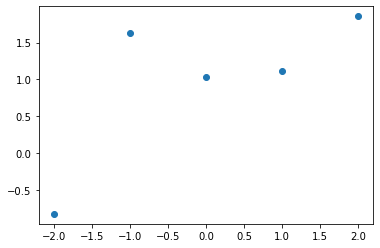

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

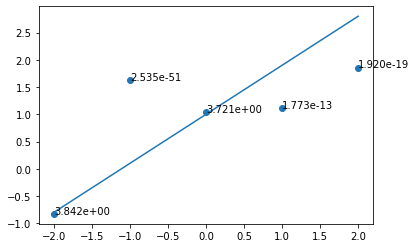

In [6]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 0.9
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

## 최대 가능도 추론, MLE

포인트 (x_n,y_n)하나의 likelihood는 정규분포의 확률로 구할 수 있다.

모든 데이터 포인트가 서로 독립이고 같은 확률 분포를 따른다고 가정한다.
그러면, 데이터셋 전체의 likelihood p(Y | k,X)는 데이터 포인트 각각의 likelihood를 모두 곱한 값과 같다.

MLE를 적용할 때는 주로 log likeligood를 최대화 하는 파라미터를 구한다. 로그를 씌우면 곱셈연산이 덧셈으로 바뀌면서 미분 계산이 편해지기 때문이다.

## MLE 최적해를 구해보자.

y = x + 1함수를 모델로 노이즈의 분포는 평균이 0이고 표준편차가 0.5인 정규분포이다.

포인트 20개를 생성하여 시각화하여 코드를 작성하자.

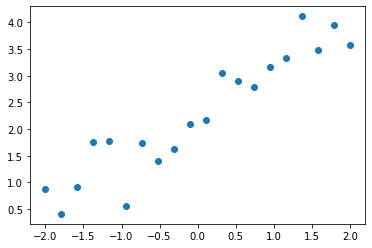

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_sampels = 20

input_data = np.linspace(-2,2, num_sampels)
labels = input_data + 2 + np.random.normal(0,0.5, size= num_sampels)
plt.scatter(input_data, labels)
plt.show()

likelihood와 파라미터 계산

데이터를 생성할 때는 노이즈 분포의 표준편차를 0.5로 임의로 정했지만, 모델 설계할 때, 노이즈의 표준편차는 알 수 없다.
노이즈의 표준편차가 0.1로 가정했다면, 다른 값들이 나온다.

또한, 입력 데이터가 실수 스칼라 값을 갖는 것처럼 보이지만, 실제로는 변수 x와 상수항이 묶인 2차원 열백터로 표현된다.

In [13]:
def likelihood(labels, preds):
  result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(np.power(labels-preds,2)/(2*0.1*0.1))

  return np.prod(result)

def neg_log_likelihood(labels, preds):
  const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

  return (-1)*(const_term + 1 / (2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 2.2847
likelihood: 3.6585e+77
negative log likelihood: 1.2325e+02


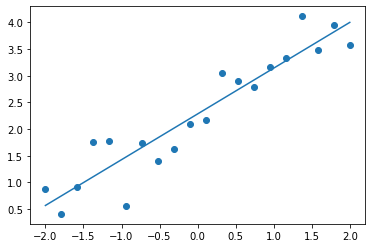

0.8578467681028765
2.2846672964728176


In [16]:
X = np.append(input_data.reshape((-1,1)), np.ones((num_sampels,1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: ' + '%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2,2,50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

print(theta_1)
print(theta_0)

## MAP: 최대 사후 확률 추정

선형 회귀 문제에서 MLE로 구한 최적 파라미터 식을 다시 살펴보면 아래 식과 같다.

> theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
> model_y = theta_1 * model_x + theta_0

MLE의 최적해는 오로지 관측된 데이터 값에만 의존하게 된다.

접근법은 계산이 간단하다는 장점이 있지만, 관측된 데이터에 노이즈가 많은 경우, 이상치 데이터가 존해하는 경우 모델의 안정성이 떨어진다.
그래서 머신러닝 모델의 최적 파라미터를 찾는 다음 방법인 MAP, 최대 사후 확률 추정을 실습해보자.

MAP는 데이터셋이 주어진 파라미터 분포에서 p(k|X)에서 확률 값을 최대화 하는 k를 찾는다.

지도 학습의 경우 posterior는 P(k|)

## MLE와 MAP의 비교

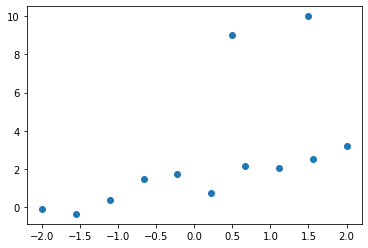

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

In [2]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


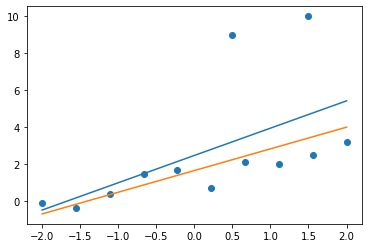

In [3]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()